In [1]:
import pandas as pd
import numpy as np

### Preparing data for cattleplusrat

In [3]:
df = pd.read_csv('cattleplusrat.csv',sep=';') 

/Users/liwenxing/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,7,8,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df

,assay_type,target_type,tax_id,organism,relation,type,value,units,standard_relation,standard_type,...,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations
0,A,ORGANISM,9913,Bos taurus,=,K,11700.0,M-1,=,K,...,NEUTRAL,241.29,3.0,18.0,0.61,241.1103,C15H15NO2,3.0,0.0,0.0
1,A,ORGANISM,9913,Bos taurus,=,K,10100.0,M-1,=,K,...,NEUTRAL,228.25,3.0,17.0,0.55,228.0786,C14H12O3,3.0,0.0,0.0
2,A,ORGANISM,9913,Bos taurus,=,K,736.0,M-1,=,K,...,NEUTRAL,216.19,3.0,16.0,0.59,216.0423,C12H8O4,4.0,0.0,0.0
3,A,ORGANISM,9913,Bos taurus,=,Km,3.9,mM,=,Km,...,ACID,303.22,2.0,20.0,0.55,303.0733,C9H14N5O5P,10.0,5.0,0.0
4,A,ORGANISM,9913,Bos taurus,=,Km,2.7,mM,=,Km,...,ACID,289.19,2.0,19.0,0.40,289.0576,C8H12N5O5P,10.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747957,T,TISSUE,9986,Oryctolagus cuniculus,=,Activity,-4.3,%,=,Activity,...,NEUTRAL,613.15,1.0,34.0,0.37,496.2816,C29H45ClN4O8,8.0,5.0,0.0
747958,T,TISSUE,9986,Oryctolagus cuniculus,=,Activity,-3.7,%,=,Activity,...,NEUTRAL,636.12,2.0,36.0,0.47,519.2412,C30H39ClFN5O7,8.0,4.0,1.0
747959,T,TISSUE,9986,Oryctolagus cuniculus,=,Activity,-3.5,%,=,Activity,...,NEUTRAL,613.15,1.0,34.0,0.37,496.2816,C29H45ClN4O8,8.0,5.0,0.0
747960,T,TISSUE,9986,Oryctolagus cuniculus,=,Activity,-4.6,%,=,Activity,...,NEUTRAL,611.18,1.0,34.0,0.49,494.3024,C30H47ClN4O7,7.0,4.0,0.0


In [88]:
df_cattleplusrat = df_cattleplusrat.drop(columns=['alogp', 'hba', 'hbd', 'psa', 'rtb', 'ro3_pass', 
                                                  'num_ro5_violations', 'cx_most_apka', 'cx_most_bpka', 'full_mwt', 
                                                  'cx_logp', 'cx_logd', 'molecular_species', 'mw_freebase', 
                                                  'aromatic_rings', 'heavy_atoms', 'qed_weighted', 'mw_monoisotopic', 
                                                  'full_molformula', 'hba_lipinski', 'hbd_lipinski', 
                                                  'num_lipinski_ro5_violations', 'assay_type', 'target_type', 'tax_id', 
                                                  'molregno', 'molregno.1', 'structure_type', 'molecule_type', 'chirality', 
                                                  'natural_product', 'relation', 'standard_inchi', 
                                                  'standard_relation', 'type', 'value', 'units'])
df_cattleplusrat

,organism,standard_type,standard_value,standard_units,chembl_id,canonical_smiles
0,Bos taurus,K,11700.0,M-1,CHEMBL24556,Cc1cc2c(o1)c(C)cc1c(C)cc(=O)n(C)c12
1,Bos taurus,K,10100.0,M-1,CHEMBL285692,Cc1cc2c(o1)c(C)cc1c(C)cc(=O)oc12
2,Bos taurus,K,736.0,M-1,CHEMBL416,COc1c2occc2cc2ccc(=O)oc12
3,Bos taurus,Km,3900000.0,nM,CHEMBL19976,CC(COCP(=O)(O)O)n1cnc2c(O)nc(N)nc21
4,Bos taurus,Km,2700000.0,nM,CHEMBL223737,Nc1nc2c(ncn2CCOCP(=O)(O)O)c(=O)[nH]1
...,...,...,...,...,...,...
747957,Oryctolagus cuniculus,Activity,-4.3,%,CHEMBL2387453,CC[C@H](C[C@H](O)[C@@H](N)CN1CC(=O)N(c2ccccc2C...
747958,Oryctolagus cuniculus,Activity,-3.7,%,CHEMBL2387557,CC(C)[C@H](C[C@H](O)[C@@H](N)CN1CC(=O)N(c2cccc...
747959,Oryctolagus cuniculus,Activity,-3.5,%,CHEMBL2387453,CC[C@H](C[C@H](O)[C@@H](N)CN1CC(=O)N(c2ccccc2C...
747960,Oryctolagus cuniculus,Activity,-4.6,%,CHEMBL2387446,CC(C)[C@H](C[C@H](O)[C@@H](N)CN1CC(=O)N(c2cccc...


In [89]:
seen = {}
for index, row in df_cattleplusrat.iterrows():
    act_type = str(row['standard_type']) + ' /' + str(row['standard_units'])
    if act_type not in seen:
        seen[act_type] = 1
    else:
        seen[act_type] += 1

seen_sorted = sorted(seen.items(), key=lambda x: x[1], reverse=True) 
print(seen_sorted)
len(seen_sorted)

[('Tissue Severity Score /nan', 125600), ('Activity /nan', 36492), ('T1/2 /hr', 23286), ('WEIGHT /g', 18548), ('CL /mL.min-1.kg-1', 16276), ('F /%', 14400), ('Activity /%', 11164), ('AUC /ng.hr.mL-1', 11147), ('Drug uptake /% ID/g', 10700), ('IC50 /nM', 10000), ('CHOL /ug.mL-1', 8413), ('GLUC /ug.mL-1', 8413), ('BUN /ug.mL-1', 8413), ('CREAT /ug.mL-1', 8413), ('PHOS /ug.mL-1', 8413), ('ALB /ug.mL-1', 8413), ('RBC /cells.uL-1', 8412), ('HCT /%', 8412), ('MCV /fL', 8412), ('PROT /ug.mL-1', 8412), ('WBC /cells.uL-1', 8411), ('HGB /ug.mL-1', 8409), ('MCH /pg', 8409), ('SODIUM /mEq.L-1', 8409), ('POTASSIUM /mEq.L-1', 8409), ('PLAT /cells.uL-1', 8393), ('NEUTLE /%', 8382), ('EOSLE /%', 8382), ('BASOLE /%', 8382), ('MONOLE /%', 8382), ('LYMLE /%', 8382), ('BILI /ug.mL-1', 8332), ('Cmax /ug.mL-1', 7202), ('Vdss /L.kg-1', 6821), ('AUC /uM.hr', 5795), ('Tmax /hr', 5710), ('LD50 /mg.kg-1', 5368), ('MCHC /%', 4709), ('RETIRBC /%', 4709), ('ALP /IU.L-1', 4709), ('TRIG /ug.mL-1', 4709), ('PHOSLPD /u

1984

In [90]:
header_list = ['T1/2 /hr', 'F /%', 'AUC /ng.hr.mL-1', 'Drug uptake /% ID/g', 'IC50 /nM', 
               'Cmax /ug.mL-1', 'Vdss /L.kg-1', 'CL /mL.min-1.kg-1', 'LD50 /mg.kg-1', 'PPB /%', 'Drug metabolism /nan',
               'Distribution /%', 'ED50 /mg.kg-1', 'Permeability /nan', 'Ratio /nan', 'Papp /ucm/s']


In [91]:
useless_headers = ['Tissue Severity Score', 'WEIGHT', 'BUN', 'ALT', 'ALP', 'CHOL', 'GLUC', 'CREAT', 'PHOS', 'ALB', 
                   'AST', 'RBC', 'HCT', 'MCV', 'PROT', 'WBC', 'HGB', 'MCH', 'MCHC', 'SODIUM', 'POTASSIUM', 'PLAT', 
                   'NEUTLE', 'EOSLE', 'BASOLE', 'MONOLE', 'LYMLE', 'BILI', 'Stabilty', 'Stability', 'Cl', 'RETIRBC', 
                   'TRIG', 'PHOSLPD', 'CALCIUM', 'ALBGLOB', 'GGT', 'TERMBW', 'BILDIR', 'PT', 'APTT', 'FIBRINO', 
                   'CHLORIDE', 'CK', 'LIPASE', 'URATE', 'Fu', 'CO2', 'BASO', 'EOS' 'LYM', 'MONO', 'NEUTSG', 'RBCNUC',
                   'TD50', 'ID/g', 'Vd', 'CLH', 'CC50', 'TIME', 'MTD', 'UI', 'Dose/organ', 'Concentration', 'Survival', 
                   'Radiolabel recovery', 'GI50', 'Dose/g', 'Radioactivity', 'Activity', 'Cp', 'LDH', 'Tmax', 'EOS',
                   'LYM', 'Biodistribution', 'Injected dose/g', 'Cp(f)', 'Ratio TD50/ED50', 'ERH', 
                   'Distribution of radioactivity', 'Plasma level']


In [92]:
for header in useless_headers:
    index_names = df_cattleplusrat[df_cattleplusrat['standard_type'] == header].index
    df_cattleplusrat.drop(index_names, inplace = True)

df_cattleplusrat = df_cattleplusrat.reset_index(drop=True)
df_cattleplusrat

,organism,standard_type,standard_value,standard_units,chembl_id,canonical_smiles
0,Bos taurus,K,11700.0,M-1,CHEMBL24556,Cc1cc2c(o1)c(C)cc1c(C)cc(=O)n(C)c12
1,Bos taurus,K,10100.0,M-1,CHEMBL285692,Cc1cc2c(o1)c(C)cc1c(C)cc(=O)oc12
2,Bos taurus,K,736.0,M-1,CHEMBL416,COc1c2occc2cc2ccc(=O)oc12
3,Bos taurus,Km,3900000.0,nM,CHEMBL19976,CC(COCP(=O)(O)O)n1cnc2c(O)nc(N)nc21
4,Bos taurus,Km,2700000.0,nM,CHEMBL223737,Nc1nc2c(ncn2CCOCP(=O)(O)O)c(=O)[nH]1
...,...,...,...,...,...,...
182820,Oryctolagus cuniculus,HD50,191.0,uM,CHEMBL392453,CCCNC(=O)[C@]12CC[C@](C)(C(=O)OC)C[C@H]1C1=CC[...
182821,Oryctolagus cuniculus,HD50,NaN,NaN,CHEMBL238261,CCNC(=O)[C@]12CC[C@](C)(C(=O)OC)C[C@H]1C1=CC[C...
182822,Oryctolagus cuniculus,HD50,276.2,uM,CHEMBL392240,CNC(=O)[C@]12CC[C@](C)(C(=O)OC)C[C@H]1C1=CC[C@...
182823,Oryctolagus cuniculus,HD50,2.4,uM,CHEMBL392239,COC(=O)[C@@]1(C)CC[C@]2(C(=O)N(C(=O)NC3CCCCC3)...


In [93]:
for i in header_list:
    df_cattleplusrat[i] = np.nan

rows_to_drop = []

for index, row in df_cattleplusrat.iterrows():
    act_type = str(row['standard_type']) + ' /' + str(row['standard_units'])
    if act_type in header_list:
        header = act_type
        df_cattleplusrat.loc[index, header] = row['standard_value']
    else:
        rows_to_drop.append(index)

df_cattleplusrat.drop(rows_to_drop, inplace = True)

df_cattleplusrat = df_cattleplusrat.sort_values(by=['chembl_id'], ascending=False).reset_index(drop=True)

In [95]:
df_cattleplusrat = df_cattleplusrat.drop(columns=['standard_type', 'standard_value', 'standard_units'])
df_cattleplusrat

,organism,chembl_id,canonical_smiles,T1/2 /hr,F /%,AUC /ng.hr.mL-1,Drug uptake /% ID/g,IC50 /nM,Cmax /ug.mL-1,Vdss /L.kg-1,CL /mL.min-1.kg-1,LD50 /mg.kg-1,PPB /%,Drug metabolism /nan,Distribution /%,ED50 /mg.kg-1,Permeability /nan,Ratio /nan,Papp /ucm/s
0,Rattus norvegicus,CHEMBL99964,CC(=O)SCCNC(=O)[C@H](C)NC(=O)CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rattus norvegicus,CHEMBL99946,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,NaN,NaN,566.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Rattus norvegicus,CHEMBL99946,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rattus norvegicus,CHEMBL99946,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,NaN,NaN,NaN,NaN,NaN,0.232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rattus norvegicus,CHEMBL99946,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114020,Mus musculus,CHEMBL100259,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...,0.03333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114021,Mus musculus,CHEMBL1002,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114022,Mus musculus,CHEMBL100020,O=C(NC(=S)NCCC1CCN(Cc2ccccc2)CC1)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114023,Mus musculus,CHEMBL100014,CCCC(=O)OCOC(=O)C(C)(C)C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import datetime

df_cattleplusrat_final = pd.DataFrame(columns=df_cattleplusrat.columns)

for i, row in df_cattleplusrat.iterrows():
    if i % 1000 == 0:
        print(datetime.datetime.now(), i)
    if i==0:
        continue
    if row['chembl_id'] == df_cattleplusrat.loc[i-1, 'chembl_id']:
        df_cattleplusrat.iloc[i] = df_cattleplusrat.iloc[i-1].combine_first(df_cattleplusrat.iloc[i])
    else:
        df_cattleplusrat_final = df_cattleplusrat_final.append(df_cattleplusrat.iloc[i-1], ignore_index=True)


df_cattleplusrat_final = df_cattleplusrat_final.append(df_cattleplusrat.iloc[len(df_cattleplusrat)-1], ignore_index=True)


In [ ]:
df_cattleplusrat_final.to_csv('df_cattleplusrat_final.csv', sep=';', index=False)

In [6]:
def pre_clean_data(df):
    """
    Pre-clean the DataFrame directly extracted from ChemBL data base by 
    dropping unnecessary columns and rows.
    
    Parameters
    ----------
    df: DataFrame
        DataFrame directly extracted from ChemBL data base with sql.
        
    Returns
    -------
    DataFrame
        The cleaned DataFrame.
    """
    columns_to_drop = [
        'alogp', 'hba', 'hbd', 'psa', 'rtb', 'ro3_pass', 
        'num_ro5_violations', 'cx_most_apka', 'cx_most_bpka', 'full_mwt', 
        'cx_logp', 'cx_logd', 'molecular_species', 'mw_freebase', 
        'aromatic_rings', 'heavy_atoms', 'qed_weighted', 'mw_monoisotopic', 
        'full_molformula', 'hba_lipinski', 'hbd_lipinski', 
        'num_lipinski_ro5_violations', 'assay_type', 'target_type', 'tax_id', 
        'molregno', 'molregno.1', 'structure_type', 'molecule_type', 'chirality', 
        'natural_product', 'relation', 'standard_inchi', 
        'standard_relation', 'type', 'value', 'units']
    
    df = df.drop(columns=columns_to_drop)
    
    types_to_drop = [
        'Tissue Severity Score', 'WEIGHT', 'BUN', 'ALT', 'ALP', 'CHOL', 
        'GLUC', 'CREAT', 'PHOS', 'ALB', 'AST', 'RBC', 'HCT', 'MCV', 
        'PROT', 'WBC', 'HGB', 'MCH', 'MCHC', 'SODIUM', 'POTASSIUM', 
        'PLAT', 'NEUTLE', 'EOSLE', 'BASOLE', 'MONOLE', 'LYMLE', 'BILI',
        'Stabilty','Stability', 'Cl', 'RETIRBC', 'TRIG', 'PHOSLPD', 
        'CALCIUM', 'ALBGLOB', 'GGT', 'TERMBW', 'BILDIR', 'PT', 'APTT', 'FIBRINO', 
        'CHLORIDE', 'CK', 'LIPASE', 'URATE', 'Fu', 'CO2', 'BASO', 'EOS' 'LYM', 
        'MONO', 'NEUTSG', 'RBCNUC', 'TD50', 'ID/g', 'Vd', 'CLH', 'CC50', 'TIME',
        'MTD', 'UI', 'Dose/organ', 'Concentration', 'Survival', 
        'Radiolabel recovery', 'GI50', 'Dose/g', 'Radioactivity', 'Activity', 
        'Cp', 'LDH', 'Tmax', 'EOS', 'LYM', 'Biodistribution', 'Injected dose/g',
        'Cp(f)', 'Ratio TD50/ED50', 'ERH', 'Distribution of radioactivity', 
        'Plasma level']

    for i in types_to_drop:
        index_names = df[df['standard_type'] == i].index
        df.drop(index_names, inplace = True)

    df = df.reset_index(drop=True)
    
    return df

In [4]:
input_df_1 = df.sample(n=10000, random_state=42)
input_df_1

,assay_type,target_type,tax_id,organism,relation,type,value,units,standard_relation,standard_type,...,molecular_species,full_mwt,aromatic_rings,heavy_atoms,qed_weighted,mw_monoisotopic,full_molformula,hba_lipinski,hbd_lipinski,num_lipinski_ro5_violations
179665,T,ORGANISM,10116,Rattus norvegicus,=,Mono,1.80,%,=,MONOLE,...,BASE,284.43,2.0,20.0,0.83,284.1347,C17H20N2S,2.0,0.0,0.0
450476,T,ORGANISM,10116,Rattus norvegicus,=,ABSOLUTE MONOCYTE,212.67,CELLS/uL,=,MONO,...,NEUTRAL,252.27,2.0,19.0,0.78,252.0899,C15H12N2O2,4.0,2.0,0.0
341747,T,ORGANISM,10116,Rattus norvegicus,=,BUN,14.60,mg/dL,=,BUN,...,NEUTRAL,238.16,1.0,17.0,0.35,238.0338,C8H6N4O5,9.0,1.0,0.0
735199,A,ORGANISM,10090,Mus musculus,=,Tmax,0.25,hr,=,Tmax,...,NEUTRAL,407.47,2.0,28.0,0.81,407.1427,C18H22FN5O3S,8.0,2.0,0.0
114851,A,ORGANISM,10116,Rattus norvegicus,=,Tmax,6.70,hr,=,Tmax,...,BASE,409.31,3.0,26.0,0.59,372.1241,C20H22Cl2N2O3,5.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25574,A,ORGANISM,10116,Rattus norvegicus,=,T1/2,20.00,min,=,T1/2,...,NEUTRAL,404.41,1.0,27.0,0.74,404.1018,C17H19F3N2O4S,6.0,1.0,0.0
409780,T,ORGANISM,10116,Rattus norvegicus,=,URIC ACID,1.60,mg/dL,=,URATE,...,ACID,435.53,3.0,32.0,0.49,435.2270,C24H29N5O3,8.0,2.0,0.0
212281,T,ORGANISM,10116,Rattus norvegicus,=,IP,7.20,mg/dL,=,PHOS,...,NEUTRAL,323.13,1.0,20.0,0.41,322.0123,C11H12Cl2N2O5,7.0,3.0,0.0
682629,A,ORGANISM,10090,Mus musculus,=,Tmax,0.50,hr,=,Tmax,...,NEUTRAL,529.97,5.0,37.0,0.31,529.0724,C25H16ClN7O3S,10.0,0.0,1.0


In [35]:
input_df_1.to_csv('input_df_1.csv', sep=';', index=False)

In [7]:
output_df_1 = pre_clean_data(input_df_1)
output_df_1

,organism,standard_type,standard_value,standard_units,chembl_id,canonical_smiles
0,Rattus norvegicus,CL,8.83300,mL.min-1.kg-1,CHEMBL3086091,O=C(c1ccc(Oc2nccnc2N2CCOCC2)cc1)c1nc2ccccc2[nH]1
1,Rattus norvegicus,T1/2,15.20000,hr,CHEMBL539222,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...
2,Rattus norvegicus,T1/2,0.35000,hr,CHEMBL2391359,CCN1CCN(CC(=O)N(C)C2CCCC2)CC1C
3,Mus musculus,Drug uptake,0.02000,% ID/g,CHEMBL1093822,CCOC(=O)CCCc1nc2cc(NC(=O)c3ccc([N+](=O)[O-])cc...
4,Mus musculus,F,10.00000,%,CHEMBL408513,O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO
...,...,...,...,...,...,...
2437,Mus musculus,AUC,1700.00000,ng.hr.mL-1,CHEMBL460261,CC(C)N1CCC(c2nc3c(C(N)=O)cc(Cl)cc3[nH]2)CC1
2438,Rattus norvegicus,logFu,0.25000,NaN,CHEMBL635,C[C@]12CC(=O)[C@H]3[C@@H](CCC4=CC(=O)C=C[C@@]4...
2439,Rattus norvegicus,T1/2,0.01267,hr,CHEMBL428685,COC(=O)CCCC=C(c1cc(C)c(OC)c(C(=O)OC)c1)c1cc(C)...
2440,Rattus norvegicus,T1/2,0.33330,hr,CHEMBL199367,N#CCNC(=O)[C@@H]1CCCC[C@H]1CS(=O)(=O)c1ccc(OC(...


In [39]:
output_df_1.to_csv('output_df_1.csv', sep=';', index=False)

In [10]:
def test_pre_clean_data():
    """
    Unit test for pre_clean_data(df) function to see if the function 
    produces correct output.
    """
    input_df = pd.read_csv('tests/input_df_1.csv',sep=';') 
    output_df = pd.read_csv('tests/output_df_1.csv',sep=';') 
    df = pre_clean_data(input_df)
    assert output_df.equals(df),\
        "The function pre_clean_data is broken!"   

In [11]:
test_pre_clean_data()

In [29]:
def rearrange_and_clean_data(df):
    """
    Rearrange the DataFrame returned by the pre_clean_data(df) function. 
    Add new empty columns with 'standard_types/standard_units' as the column 
    headers and then fill the table cells with standard values. 
    Drop unnecessary rows and columns.
    
    Parameters
    ----------
    df: DataFrame
        DataFrame returned by the pre_clean_data(df) function.
    
    Returns
    -------
    DataFrame
        The rearranged and cleaned DataFrame.
    """
    # The features we want to predict.
    header_list = [
        'T1/2 /hr', 'F /%', 'AUC /ng.hr.mL-1', 'IC50 /nM', 'Cmax /ug.mL-1', 
        'Vdss /L.kg-1', 'CL /mL.min-1.kg-1', 'LD50 /mg.kg-1', 'PPB /%', 
        'Papp /ucm/s']
    
    new_columns = ['chembl_id', 'organism', 'canonical_smiles', 'T1/2 /hr', 
        'F /%', 'AUC /ng.hr.mL-1', 'IC50 /nM', 'Cmax /ug.mL-1', 
        'Vdss /L.kg-1', 'CL /mL.min-1.kg-1', 'LD50 /mg.kg-1', 'PPB /%', 
        'Papp /ucm/s']
    
    # Add empty columns with the features as the column headers.
    for i in header_list:
        df[i] = np.nan

    rows_to_drop = []
    
    # Fill the values in the table cells and drop unnecessary rows.
    for index, row in df.iterrows():
        types = str(row['standard_type']) + ' /' + str(row['standard_units'])
        if types in header_list:
            df.loc[index, types] = row['standard_value']
        else:
            rows_to_drop.append(index)

    df.drop(rows_to_drop, inplace = True)
   
    df = df.drop(columns=['standard_type', 'standard_value', 'standard_units'])
    df = df.reset_index(drop=True)
    df = df[new_columns]
    
    return df

In [30]:
output_df_2 = rearrange_and_clean_data(pd.read_csv('tests/output_df_1.csv',sep=';'))
output_df_2

,chembl_id,organism,canonical_smiles,T1/2 /hr,F /%,AUC /ng.hr.mL-1,IC50 /nM,Cmax /ug.mL-1,Vdss /L.kg-1,CL /mL.min-1.kg-1,LD50 /mg.kg-1,PPB /%,Papp /ucm/s
0,CHEMBL3086091,Rattus norvegicus,O=C(c1ccc(Oc2nccnc2N2CCOCC2)cc1)c1nc2ccccc2[nH]1,NaN,NaN,NaN,NaN,NaN,NaN,8.833,NaN,NaN,NaN
1,CHEMBL539222,Rattus norvegicus,CC[C@H]1OC(=O)[C@H](C)[C@@H](O[C@H]2C[C@@](C)(...,15.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CHEMBL2391359,Rattus norvegicus,CCN1CCN(CC(=O)N(C)C2CCCC2)CC1C,0.35000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CHEMBL408513,Mus musculus,O=C(/C=C/c1cccc(S(=O)(=O)Nc2ccccc2)c1)NO,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHEMBL481423,Rattus norvegicus,COc1cc2ncc(C(N)=O)c(Nc3ccc(Cl)c(Cl)c3)c2cc1N1C...,1.20000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,CHEMBL1797124,Rattus norvegicus,Cc1cc(OCc2ccc(F)cc2F)c(Cl)c(=O)n1-c1c(F)cccc1F,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1284,CHEMBL460261,Mus musculus,CC(C)N1CCC(c2nc3c(C(N)=O)cc(Cl)cc3[nH]2)CC1,NaN,NaN,1700.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1285,CHEMBL428685,Rattus norvegicus,COC(=O)CCCC=C(c1cc(C)c(OC)c(C(=O)OC)c1)c1cc(C)...,0.01267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1286,CHEMBL199367,Rattus norvegicus,N#CCNC(=O)[C@@H]1CCCC[C@H]1CS(=O)(=O)c1ccc(OC(...,0.33330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
output_df_2.to_csv('output_df_2.csv', sep=';', index=False)

In [34]:
def test_rearrange_and_clean_data():
    """
    Unit test for rearrange_and_clean_data(df) function to see if the function 
    produces correct output.
    """
    input_df = pd.read_csv('tests/output_df_1.csv',sep=';') 
    output_df = pd.read_csv('tests/output_df_2.csv',sep=';') 
    df = rearrange_and_clean_data(input_df)
    assert output_df.equals(df),\
        "The function rearrange_and_clean_data is broken!"   

In [35]:
test_rearrange_and_clean_data()

In [21]:
def combine_rows(df):
    """
    Combine the rows that represent the same molecule (same 'chembl_id').
    
    Parameters
    ----------
    df: DataFrame
        DataFrame returned by rearrange_and_clean_data(df) function.
        
    Returns
    -------
    DataFrame
        The final DataFrame ready to be trained.
    """
    # Rearrange the rows based on their chembl_ids.
    df = df.sort_values(by=['chembl_id'], ascending=False).reset_index(drop=True)
   
    df_final = pd.DataFrame(columns=df.columns)

    # Combine the rows that represent the same molecule and put the combined row 
    # into a new DataFrame df_final.
    for i, row in df.iterrows():
        if i==0:
            continue
        if row['chembl_id'] == df.loc[i-1, 'chembl_id']:
            df.iloc[i] = df.iloc[i-1].combine_first(df.iloc[i])
        else:
            df_final = df_final.append(df.iloc[i-1], ignore_index=True)

    df_final = df_final.append(df.iloc[len(df)-1], ignore_index=True)
    
    return df_final

In [36]:
output_df_3 = combine_rows(pd.read_csv('tests/output_df_2.csv',sep=';'))
output_df_3

,chembl_id,organism,canonical_smiles,T1/2 /hr,F /%,AUC /ng.hr.mL-1,IC50 /nM,Cmax /ug.mL-1,Vdss /L.kg-1,CL /mL.min-1.kg-1,LD50 /mg.kg-1,PPB /%,Papp /ucm/s
0,CHEMBL99679,Rattus norvegicus,c1ccc(-c2ccc(CC3CN4CCC3CC4)cc2)cc1,NaN,NaN,NaN,20500.0,NaN,NaN,NaN,NaN,NaN,NaN
1,CHEMBL98,Mus musculus,O=C(CCCCCCC(=O)Nc1ccccc1)NO,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CHEMBL976,Mus musculus,O=C(C1CCCCC1)N1CC(=O)N2CCc3ccccc3C2C1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN
3,CHEMBL9562,Mus musculus,CN(C(=O)CN)c1ccc(Cl)cc1C(=O)c1c(Cl)cccc1Cl.Cl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,245.0,NaN,NaN
4,CHEMBL95,Mus musculus,Nc1c2c(nc3ccccc13)CCCC2,NaN,NaN,NaN,115.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,CHEMBL1079888,Rattus norvegicus,N#C[C@H](Cc1ccc(-c2ccccc2)s1)NC(=O)[C@@H](N)Cc...,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN
1249,CHEMBL1076330,Rattus norvegicus,Cn1cnc(-c2ccccc2)c1-c1nc2c(N)ncnc2s1,NaN,NaN,NaN,NaN,NaN,NaN,30.1,NaN,NaN,NaN
1250,CHEMBL106966,Rattus norvegicus,COc1cc2ncnc(N3CCN(C(=O)Nc4ccc(C#N)cc4)CC3)c2cc1OC,NaN,NaN,NaN,NaN,NaN,0.18,NaN,NaN,NaN,NaN
1251,CHEMBL106298,Rattus norvegicus,C[N+]1([O-])CCN(c2ccc3nc(O)c4ccccc4c3n2)CC1,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN


In [37]:
output_df_3.to_csv('output_df_3.csv', sep=';', index=False)

In [38]:
def test_combine_rows():
    """
    Unit test for combine_rows(df) function to see if the function 
    produces correct output.
    """
    input_df = pd.read_csv('tests/output_df_2.csv',sep=';') 
    output_df = pd.read_csv('tests/output_df_3.csv',sep=';') 
    df = combine_rows(input_df)
    assert output_df.equals(df),\
        "The function combine_rows is broken!"   

In [39]:
test_combine_rows()

In [53]:
def remove_NaN(df_final):
    """
    Remove all the NaN values for individual feature.
    
    Parameters
    ----------
    df: DataFrame
        DataFrame obtained from combine_rows.
        
    Returns
    -------
    DataFrame
        The final DataFrames ready to be trained.
    """
    columns_T_half = ['chembl_id', 'organism', 'canonical_smiles', 'T1/2 /hr']
    df_T_half_pre = df_final[columns_T_half]

    columns_F = ['chembl_id', 'organism', 'canonical_smiles', 'F /%']
    df_F_pre = df_final[columns_F] 

    columns_AUC = ['chembl_id', 'organism', 'canonical_smiles', 'AUC /ng.hr.mL-1']
    df_AUC_pre = df_final[columns_AUC] 

    columns_Cmax = ['chembl_id', 'organism', 'canonical_smiles', 'Cmax /ug.mL-1']
    df_Cmax_pre = df_final[columns_Cmax] 

    columns_Vdss = ['chembl_id', 'organism', 'canonical_smiles', 'Vdss /L.kg-1']
    df_Vdss_pre = df_final[columns_Vdss] 

    columns_CL = ['chembl_id', 'organism', 'canonical_smiles', 'CL /mL.min-1.kg-1']
    df_CL_pre = df_final[columns_CL]  

    columns_LD50 = ['chembl_id', 'organism', 'canonical_smiles', 'LD50 /mg.kg-1']
    df_LD50_pre = df_final[columns_LD50]

    columns_IC50 = ['chembl_id', 'organism', 'canonical_smiles', 'IC50 /nM']
    df_IC50_pre = df_final[columns_IC50]

    columns_PPB = ['chembl_id', 'organism', 'canonical_smiles', 'PPB /%']
    df_PPB_pre = df_final[columns_PPB]
    
    rows_to_drop_T_half = []
    for index, row in df_T_half_pre.iterrows():
        if math.isnan(row['T1/2 /hr']) == True:
            rows_to_drop_T_half.append(index)

    df_T_half_final = df_T_half_pre.drop(rows_to_drop_T_half)
    df_T_half_final = df_T_half_final.reset_index(drop=True)


    rows_to_drop_F = []
    for index, row in df_F_pre.iterrows():
        if math.isnan(row['F /%']) == True:
            rows_to_drop_F.append(index)

    df_F_final = df_F_pre.drop(rows_to_drop_F)
    df_F_final = df_F_final.reset_index(drop=True)


    rows_to_drop_AUC = []
    for index, row in df_AUC_pre.iterrows():
        if math.isnan(row['AUC /ng.hr.mL-1']) == True:
            rows_to_drop_AUC.append(index)

    df_AUC_final = df_AUC_pre.drop(rows_to_drop_AUC)
    df_AUC_final = df_AUC_final.reset_index(drop=True)


    rows_to_drop_Cmax = []
    for index, row in df_Cmax_pre.iterrows():
        if math.isnan(row['Cmax /ug.mL-1']) == True:
            rows_to_drop_Cmax.append(index)

    df_Cmax_final = df_Cmax_pre.drop(rows_to_drop_Cmax)
    df_Cmax_final = df_Cmax_final.reset_index(drop=True)


    rows_to_drop_Vdss = []
    for index, row in df_Vdss_pre.iterrows():
        if math.isnan(row['Vdss /L.kg-1']) == True:
            rows_to_drop_Vdss.append(index)

    df_Vdss_final = df_Vdss_pre.drop(rows_to_drop_Vdss)
    df_Vdss_final = df_Vdss_final.reset_index(drop=True)


    rows_to_drop_CL = []
    for index, row in df_CL_pre.iterrows():
        if math.isnan(row['CL /mL.min-1.kg-1']) == True:
            rows_to_drop_CL.append(index)

    df_CL_final = df_CL_pre.drop(rows_to_drop_CL)
    df_CL_final = df_CL_final.reset_index(drop=True)


    rows_to_drop_LD50 = []
    for index, row in df_LD50_pre.iterrows():
        if math.isnan(row['LD50 /mg.kg-1']) == True:
            rows_to_drop_LD50.append(index)

    df_LD50_final = df_LD50_pre.drop(rows_to_drop_LD50)
    df_LD50_final = df_LD50_final.reset_index(drop=True)


    rows_to_drop_IC50 = []
    for index, row in df_IC50_pre.iterrows():
        if math.isnan(row['IC50 /nM']) == True:
            rows_to_drop_IC50.append(index)

    df_IC50_final = df_IC50_pre.drop(rows_to_drop_IC50)
    df_IC50_final = df_IC50_final.reset_index(drop=True)


    rows_to_drop_PPB = []
    for index, row in df_PPB_pre.iterrows():
        if math.isnan(row['PPB /%']) == True:
            rows_to_drop_PPB.append(index)

    df_PPB_final = df_PPB_pre.drop(rows_to_drop_PPB)
    df_PPB_final = df_PPB_final.reset_index(drop=True)
    
    return df_T_half_final, df_F_final, df_AUC_final, df_Cmax_final,\
           df_Vdss_final, df_CL_final, df_LD50_final, df_IC50_final, df_PPB_final

In [61]:
df_T_half_test, df_F_test, df_AUC_test, df_Cmax_test,\
df_Vdss_test, df_CL_test, df_LD50_test, df_IC50_test,\
df_PPB_test = remove_NaN(pd.read_csv('tests/output_df_3.csv',sep=';'))

In [62]:
df_T_half_test.to_csv('df_T_half_test.csv', sep=';', index=False)
df_F_test.to_csv('df_F_test.csv', sep=';', index=False)
df_AUC_test.to_csv('df_AUC_test.csv', sep=';', index=False)
df_Cmax_test.to_csv('df_Cmax_test.csv', sep=';', index=False)
df_Vdss_test.to_csv('df_Vdss_test.csv', sep=';', index=False)
df_CL_test.to_csv('df_CL_test.csv', sep=';', index=False)
df_LD50_test.to_csv('df_LD50_test.csv', sep=';', index=False)
df_IC50_test.to_csv('df_IC50_test.csv', sep=';', index=False)
df_PPB_test.to_csv('df_PPB_test.csv', sep=';', index=False)

In [63]:
df_CL_test

,chembl_id,organism,canonical_smiles,CL /mL.min-1.kg-1
0,CHEMBL79263,Rattus norvegicus,CCOC(=O)[C@]1(Cc2ccccc2)CCCN(C(=O)[C@@H](Cc2c[...,206.0
1,CHEMBL77924,Rattus norvegicus,O=C(O)[C@H](Cc1ccc2oc(-c3c(Cl)cccc3Cl)nc2c1)NC...,24.0
2,CHEMBL685,Mus musculus,COC(=O)Nc1nc2ccc(C(=O)c3ccccc3)cc2[nH]1,27.4
3,CHEMBL61951,Rattus norvegicus,CNC(=N)c1cccc(/C(C)=C(/F)C(=O)Nc2ccc(-c3ccncc3...,15.4
4,CHEMBL609578,Rattus norvegicus,Cc1cccc(CNC(=O)c2cc(-c3ccc(C)o3)nc(N)n2)n1,32.5
...,...,...,...,...
216,CHEMBL1091978,Mus musculus,Cc1c(CN2CCN(S(C)(=O)=O)CC2)sc2c(N3CCOCC3)nc(-c...,15.0
217,CHEMBL1090508,Rattus norvegicus,CN(C)Cc1ccc(-c2cc3c(-c4cnn(C)c4)ccnc3[nH]2)cc1,86.0
218,CHEMBL1085082,Rattus norvegicus,O=C(Nc1cc2cc[nH]c(=O)c2cc1Cl)C1CCNCC1,53.0
219,CHEMBL1079888,Rattus norvegicus,N#C[C@H](Cc1ccc(-c2ccccc2)s1)NC(=O)[C@@H](N)Cc...,100.0


In [67]:
def test_remove_NaN():
    """
    Unit test for remove_NaN(df_final) function to see if the function 
    produces correct output.
    """
    input_df = pd.read_csv('tests/output_df_3.csv',sep=';') 
    df_T_half_output = pd.read_csv('tests/df_T_half_test.csv', sep=';')
    df_F_output = pd.read_csv('tests/df_F_test.csv', sep=';')
    df_AUC_output = pd.read_csv('tests/df_AUC_test.csv', sep=';')
    df_Cmax_output = pd.read_csv('tests/df_Cmax_test.csv', sep=';')
    df_Vdss_output = pd.read_csv('tests/df_Vdss_test.csv', sep=';')
    df_CL_output = pd.read_csv('tests/df_CL_test.csv', sep=';')
    df_LD50_output = pd.read_csv('tests/df_LD50_test.csv', sep=';')
    df_IC50_output = pd.read_csv('tests/df_IC50_test.csv', sep=';')
    df_PPB_output = pd.read_csv('tests/df_PPB_test.csv', sep=';')
 
    df_T_half, df_F, df_AUC, df_Cmax, df_Vdss, df_CL, df_LD50,\
    df_IC50, df_PPB = remove_NaN(input_df)
    assert df_T_half.equals(df_T_half_output) and df_F.equals(df_F_output)\
           and df_AUC.equals(df_AUC_output) and df_Cmax.equals(df_Cmax_output)\
           and df_Vdss.equals(df_Vdss_output) and df_CL.equals(df_CL_output)\
           and df_LD50.equals(df_LD50_output) and df_IC50.equals(df_IC50_output)\
           and df_PPB.equals(df_PPB_output), "The function remove_NaN is broken!"   

In [68]:
test_remove_NaN()

In [69]:
df_final = pd.read_csv('cattleplusrat_final.csv',sep=';') 
df_final

,organism,chembl_id,canonical_smiles,T1/2 /hr,F /%,AUC /ng.hr.mL-1,Drug uptake /% ID/g,IC50 /nM,Cmax /ug.mL-1,Vdss /L.kg-1,CL /mL.min-1.kg-1,LD50 /mg.kg-1,PPB /%,Drug metabolism /nan,Distribution /%,ED50 /mg.kg-1,Permeability /nan,Ratio /nan,Papp /ucm/s
0,Rattus norvegicus,CHEMBL99964,CC(=O)SCCNC(=O)[C@H](C)NC(=O)CN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rattus norvegicus,CHEMBL99946,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,NaN,NaN,566.0,NaN,NaN,0.232,NaN,24.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Rattus norvegicus,CHEMBL9993,CCCN1CCC[C@H]2c3cccnc3CC[C@H]21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rattus norvegicus,CHEMBL99893,C/C(=C(\F)C(=O)Nc1ccc(-c2ccccc2S(N)(=O)=O)cc1B...,NaN,52.0,NaN,NaN,NaN,0.630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Mus musculus,CHEMBL99852,Oc1cccc(/C=C/c2cc(O)cc(O)c2)c1,NaN,NaN,NaN,NaN,30000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41538,Mus musculus,CHEMBL100259,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...,0.03333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41539,Mus musculus,CHEMBL1002,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41540,Mus musculus,CHEMBL100020,O=C(NC(=S)NCCC1CCN(Cc2ccccc2)CC1)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41541,Mus musculus,CHEMBL100014,CCCC(=O)OCOC(=O)C(C)(C)C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
new_columns = ['chembl_id', 'organism', 'canonical_smiles', 'T1/2 /hr', 'F /%', 'AUC /ng.hr.mL-1',
               'Cmax /ug.mL-1', 'Vdss /L.kg-1', 'CL /mL.min-1.kg-1', 'LD50 /mg.kg-1', 'IC50 /nM', 'PPB /%']

In [71]:
df_final = df_final[new_columns]
df_final

,chembl_id,organism,canonical_smiles,T1/2 /hr,F /%,AUC /ng.hr.mL-1,Cmax /ug.mL-1,Vdss /L.kg-1,CL /mL.min-1.kg-1,LD50 /mg.kg-1,IC50 /nM,PPB /%
0,CHEMBL99964,Rattus norvegicus,CC(=O)SCCNC(=O)[C@H](C)NC(=O)CN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN
1,CHEMBL99946,Rattus norvegicus,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,NaN,NaN,566.0,0.232,NaN,24.0,NaN,NaN,13.0
2,CHEMBL9993,Rattus norvegicus,CCCN1CCC[C@H]2c3cccnc3CC[C@H]21,NaN,NaN,NaN,NaN,NaN,NaN,139.0,NaN,NaN
3,CHEMBL99893,Rattus norvegicus,C/C(=C(\F)C(=O)Nc1ccc(-c2ccccc2S(N)(=O)=O)cc1B...,NaN,52.0,NaN,0.630,NaN,NaN,NaN,NaN,NaN
4,CHEMBL99852,Mus musculus,Oc1cccc(/C=C/c2cc(O)cc(O)c2)c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
41538,CHEMBL100259,Mus musculus,O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O...,0.03333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41539,CHEMBL1002,Mus musculus,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41540,CHEMBL100020,Mus musculus,O=C(NC(=S)NCCC1CCN(Cc2ccccc2)CC1)c1ccccc1,NaN,NaN,NaN,NaN,NaN,NaN,75.0,NaN,NaN
41541,CHEMBL100014,Mus musculus,CCCC(=O)OCOC(=O)C(C)(C)C,NaN,NaN,NaN,NaN,NaN,NaN,1360.0,NaN,NaN


In [72]:
df_final.head(n=60)

,chembl_id,organism,canonical_smiles,T1/2 /hr,F /%,AUC /ng.hr.mL-1,Cmax /ug.mL-1,Vdss /L.kg-1,CL /mL.min-1.kg-1,LD50 /mg.kg-1,IC50 /nM,PPB /%
0,CHEMBL99964,Rattus norvegicus,CC(=O)SCCNC(=O)[C@H](C)NC(=O)CN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,NaN,NaN
1,CHEMBL99946,Rattus norvegicus,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,NaN,NaN,566.0,0.23200,NaN,24.0000,NaN,NaN,13.0
2,CHEMBL9993,Rattus norvegicus,CCCN1CCC[C@H]2c3cccnc3CC[C@H]21,NaN,NaN,NaN,NaN,NaN,NaN,139.0,NaN,NaN
3,CHEMBL99893,Rattus norvegicus,C/C(=C(\F)C(=O)Nc1ccc(-c2ccccc2S(N)(=O)=O)cc1B...,NaN,52.0,NaN,0.63000,NaN,NaN,NaN,NaN,NaN
4,CHEMBL99852,Mus musculus,Oc1cccc(/C=C/c2cc(O)cc(O)c2)c1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30000.0,NaN
5,CHEMBL99828,Rattus norvegicus,Cc1cc(-c2ccc(S(C)(=O)=O)cc2)c(-c2ccc(F)cc2)s1,19.4000,0.9,NaN,0.20000,16.80,35.8300,NaN,NaN,NaN
6,CHEMBL998,Mus musculus,CCOC(=O)N1CCC(=C2c3ccc(Cl)cc3CCc3cccnc32)CC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CHEMBL99792,Rattus norvegicus,FC(F)(F)c1cc(CO[C@H]2CCCN(Cc3nc[nH]n3)[C@H]2c2...,NaN,NaN,NaN,NaN,NaN,44.0000,NaN,NaN,NaN
8,CHEMBL99679,Rattus norvegicus,c1ccc(-c2ccc(CC3CN4CCC3CC4)cc2)cc1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20500.0,NaN
9,CHEMBL9967,Mus musculus,CN1CCN(CC(=O)N2c3ccccc3C(=O)Nc3cccnc32)CC1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output, display

import seaborn as sns
sns.set()

%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})

In [74]:
seen = {}
for index, row in df_final.iterrows():
    organism = row['organism']
    if organism not in seen:
        seen[organism] = 1
    else:
        seen[organism] += 1
        
seen_sorted = sorted(seen.items(), key=lambda x: x[1], reverse=True) 
print(seen_sorted)
len(seen_sorted)

[('Rattus norvegicus', 25245), ('Mus musculus', 15199), ('Sus scrofa', 804), ('Ovis aries', 129), ('Oryctolagus cuniculus', 84), ('Bos taurus', 82)]


6

In [75]:
organism_list = ['Rattus norvegicus', 'Mus musculus', 'Sus scrofa', 'Ovis aries', 
                 'Oryctolagus cuniculus', 'Bos taurus']
act_list = ['T1/2 /hr', 'F /%', 'AUC /ng.hr.mL-1', 'Cmax /ug.mL-1', 'Vdss /L.kg-1', 'CL /mL.min-1.kg-1', 
            'LD50 /mg.kg-1', 'IC50 /nM', 'PPB /%']
df_counts = pd.DataFrame(data = 0, columns = act_list, index = organism_list)


In [76]:
import math

In [80]:
df_counts = pd.DataFrame(data = 0, columns = organism_list, index = act_list)
for index, row in df_final.iterrows():
    for i in organism_list:
        if row['organism'] == i:
            for j in act_list:
                if math.isnan(row[j]) == False:
                    df_counts.loc[j, i] += 1
        

In [81]:
df_counts

,Rattus norvegicus,Mus musculus,Sus scrofa,Ovis aries,Oryctolagus cuniculus,Bos taurus
T1/2 /hr,12427,4638,103,4,35,30
F /%,9812,2479,42,1,8,1
AUC /ng.hr.mL-1,4515,2022,10,3,15,0
Cmax /ug.mL-1,3532,1498,9,3,11,0
Vdss /L.kg-1,4883,1185,21,0,6,0
CL /mL.min-1.kg-1,10719,2724,67,1,17,0
LD50 /mg.kg-1,705,3848,0,3,10,0
IC50 /nM,4591,3828,66,128,24,32
PPB /%,1205,399,16,0,11,13


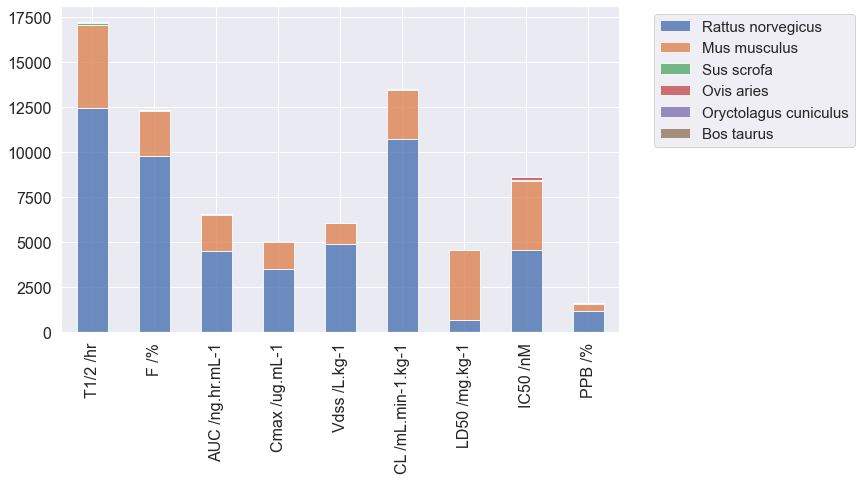

In [82]:
df_counts.plot(figsize=(10,6), kind='bar', alpha=0.8, stacked=True, fontsize=16)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

In [251]:
rows_to_drop = []

for index, row in df_final.iterrows():
    for i in act_list:
        if math.isnan(row[i]) == True:
            rows_to_drop.append(index)
            break
        else:
            continue

df_final_new = df_final.drop(rows_to_drop)
                    
df_final_new

,chembl_id,organism,canonical_smiles,T1/2 /hr,F /%,AUC /ng.hr.mL-1,Cmax /ug.mL-1,Vdss /L.kg-1,CL /mL.min-1.kg-1,LD50 /mg.kg-1,IC50 /nM,PPB /%


In [255]:
columns_T_half = ['chembl_id', 'organism', 'canonical_smiles', 'T1/2 /hr']
df_T_half_pre = df_final[columns_T_half]

columns_F = ['chembl_id', 'organism', 'canonical_smiles', 'F /%']
df_F_pre = df_final[columns_F] 

columns_AUC = ['chembl_id', 'organism', 'canonical_smiles', 'AUC /ng.hr.mL-1']
df_AUC_pre = df_final[columns_AUC] 

columns_Cmax = ['chembl_id', 'organism', 'canonical_smiles', 'Cmax /ug.mL-1']
df_Cmax_pre = df_final[columns_Cmax] 

columns_Vdss = ['chembl_id', 'organism', 'canonical_smiles', 'Vdss /L.kg-1']
df_Vdss_pre = df_final[columns_Vdss] 

columns_CL = ['chembl_id', 'organism', 'canonical_smiles', 'CL /mL.min-1.kg-1']
df_CL_pre = df_final[columns_CL]  

columns_LD50 = ['chembl_id', 'organism', 'canonical_smiles', 'LD50 /mg.kg-1']
df_LD50_pre = df_final[columns_LD50]

columns_IC50 = ['chembl_id', 'organism', 'canonical_smiles', 'IC50 /nM']
df_IC50_pre = df_final[columns_IC50]

columns_PPB = ['chembl_id', 'organism', 'canonical_smiles', 'PPB /%']
df_PPB_pre = df_final[columns_PPB]

In [261]:
rows_to_drop_T_half = []
for index, row in df_T_half_pre.iterrows():
    if math.isnan(row['T1/2 /hr']) == True:
        rows_to_drop_T_half.append(index)

df_T_half_final = df_T_half_pre.drop(rows_to_drop_T_half)
df_T_half_final = df_T_half_final.reset_index(drop=True)


rows_to_drop_F = []
for index, row in df_F_pre.iterrows():
    if math.isnan(row['F /%']) == True:
        rows_to_drop_F.append(index)

df_F_final = df_F_pre.drop(rows_to_drop_F)
df_F_final = df_F_final.reset_index(drop=True)


rows_to_drop_AUC = []
for index, row in df_AUC_pre.iterrows():
    if math.isnan(row['AUC /ng.hr.mL-1']) == True:
        rows_to_drop_AUC.append(index)

df_AUC_final = df_AUC_pre.drop(rows_to_drop_AUC)
df_AUC_final = df_AUC_final.reset_index(drop=True)


rows_to_drop_Cmax = []
for index, row in df_Cmax_pre.iterrows():
    if math.isnan(row['Cmax /ug.mL-1']) == True:
        rows_to_drop_Cmax.append(index)

df_Cmax_final = df_Cmax_pre.drop(rows_to_drop_Cmax)
df_Cmax_final = df_Cmax_final.reset_index(drop=True)


rows_to_drop_Vdss = []
for index, row in df_Vdss_pre.iterrows():
    if math.isnan(row['Vdss /L.kg-1']) == True:
        rows_to_drop_Vdss.append(index)

df_Vdss_final = df_Vdss_pre.drop(rows_to_drop_Vdss)
df_Vdss_final = df_Vdss_final.reset_index(drop=True)


rows_to_drop_CL = []
for index, row in df_CL_pre.iterrows():
    if math.isnan(row['CL /mL.min-1.kg-1']) == True:
        rows_to_drop_CL.append(index)

df_CL_final = df_CL_pre.drop(rows_to_drop_CL)
df_CL_final = df_CL_final.reset_index(drop=True)


rows_to_drop_LD50 = []
for index, row in df_LD50_pre.iterrows():
    if math.isnan(row['LD50 /mg.kg-1']) == True:
        rows_to_drop_LD50.append(index)

df_LD50_final = df_LD50_pre.drop(rows_to_drop_LD50)
df_LD50_final = df_LD50_final.reset_index(drop=True)


rows_to_drop_IC50 = []
for index, row in df_IC50_pre.iterrows():
    if math.isnan(row['IC50 /nM']) == True:
        rows_to_drop_IC50.append(index)

df_IC50_final = df_IC50_pre.drop(rows_to_drop_IC50)
df_IC50_final = df_IC50_final.reset_index(drop=True)


rows_to_drop_PPB = []
for index, row in df_PPB_pre.iterrows():
    if math.isnan(row['PPB /%']) == True:
        rows_to_drop_PPB.append(index)

df_PPB_final = df_PPB_pre.drop(rows_to_drop_PPB)
df_PPB_final = df_PPB_final.reset_index(drop=True)

In [264]:
df_CL_final

,chembl_id,organism,canonical_smiles,CL /mL.min-1.kg-1
0,CHEMBL99946,Rattus norvegicus,CCN(CC)C(=O)[C@@]1(c2ccccc2)C[C@H]1CN,24.00
1,CHEMBL99828,Rattus norvegicus,Cc1cc(-c2ccc(S(C)(=O)=O)cc2)c(-c2ccc(F)cc2)s1,35.83
2,CHEMBL99792,Rattus norvegicus,FC(F)(F)c1cc(CO[C@H]2CCCN(Cc3nc[nH]n3)[C@H]2c2...,44.00
3,CHEMBL9946,Rattus norvegicus,CCCCN(CC)c1nc(C)nc2c1c(C)cn2-c1c(C)cc(C)cc1C,82.00
4,CHEMBL99066,Rattus norvegicus,CC(C)c1ccccc1Sc1ccc(/C=C/C(=O)N2CCCC(C(=O)O)C2...,55000.00
...,...,...,...,...
13523,CHEMBL101503,Rattus norvegicus,CS(=O)(=O)c1ccc(-c2ccccc2-c2ccccc2)cc1,28.17
13524,CHEMBL101382,Rattus norvegicus,Oc1ccc2c(c1)CCN(c1ccccc1)C2c1ccc(OCCN2CCCCC2)cc1,51.90
13525,CHEMBL101083,Rattus norvegicus,CC1(c2ccc(OCCN3CCCCC3)cc2)c2ccc(O)cc2CCN1c1ccc...,64.90
13526,CHEMBL100379,Rattus norvegicus,C[C@H](NC(=O)/C=C/c1ccc(F)cc1)c1ccc(F)c(N2CCOC...,17.80


In [265]:
df_T_half_final.to_csv('df_T_half_final.csv', sep=';', index=False)
df_F_final.to_csv('df_F_final.csv', sep=';', index=False)
df_AUC_final.to_csv('df_AUC_final.csv', sep=';', index=False)
df_Cmax_final.to_csv('df_Cmax_final.csv', sep=';', index=False)
df_Vdss_final.to_csv('df_Vdss_final.csv', sep=';', index=False)
df_CL_final.to_csv('df_CL_final.csv', sep=';', index=False)
df_LD50_final.to_csv('df_LD50_final.csv', sep=';', index=False)
df_IC50_final.to_csv('df_IC50_final.csv', sep=';', index=False)
df_PPB_final.to_csv('df_PPB_final.csv', sep=';', index=False)